In [4]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
# importing data
df = pd.read_csv('unique_outages.csv', parse_dates=['Start', 'Finish'])
# df = df.replace({r"\r|\n": " "}, regex=True)
# df.columns = df.columns.str.replace(r'[\r\n]', ' ', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
# df = df.drop(columns=['Status_Description_Market', 'Market_Notice_Code', 'Impact_Region'])

# remove unplanned
df = df[df['Unplanned?'] != 1]

# filter the duration hours, only if there are expected outages, and non-outlier values, remove the one 'VIC/ TAS'
df = df[(df['Duration_Hours'] <= 1000) &(df['Duration_Hours'] != 0) & (df['Region'] != 'VIC/ TAS')]
df.head(5)

,Region,NSP,Start,Finish,Network Asset,Recall_Day_Hours,Recall_Night_Hours,Project Work?,Unplanned?,DNSP Aware?,Generator Aware?,Inter-Regional,Status_Description,Status_Code,Reason,Duration_Hours,Impact,file_name,Asset Type
0,VIC,AusNet,2024-11-11 06:00:00,2024-11-11 16:00:00,Haunted Gully - Tarrone 500 Kv line,2,0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,Line
1,VIC,AusNet,2025-02-04 06:00:00,2025-02-04 16:00:00,Bulgana - Horsham 220 kV Line,60,0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,Line
2,VIC,AusNet,2025-03-03 05:00:00,2025-03-03 17:00:00,Kiamal SF-Red Cliffs 220 kV LINE,3,0,0,0,0,0,0,Planned,SUBMIT,Maintenance,12.0,A credible contingency event during this plann...,2024-08-26,Line
3,VIC,AusNet,2025-06-21 07:00:00,2025-06-21 17:00:00,Kiamal SF-Red Cliffs 220 kV LINE,60,0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,Line
4,VIC,AusNet,2025-01-27 06:00:00,2025-01-27 16:00:00,MooraboolSydenham No.2 500 kV Line,4,0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,Line


In [6]:
df['Region'].value_counts()

Region
VIC    1256
QLD     378
SA      288
NSW     281
TAS     145
Name: count, dtype: int64

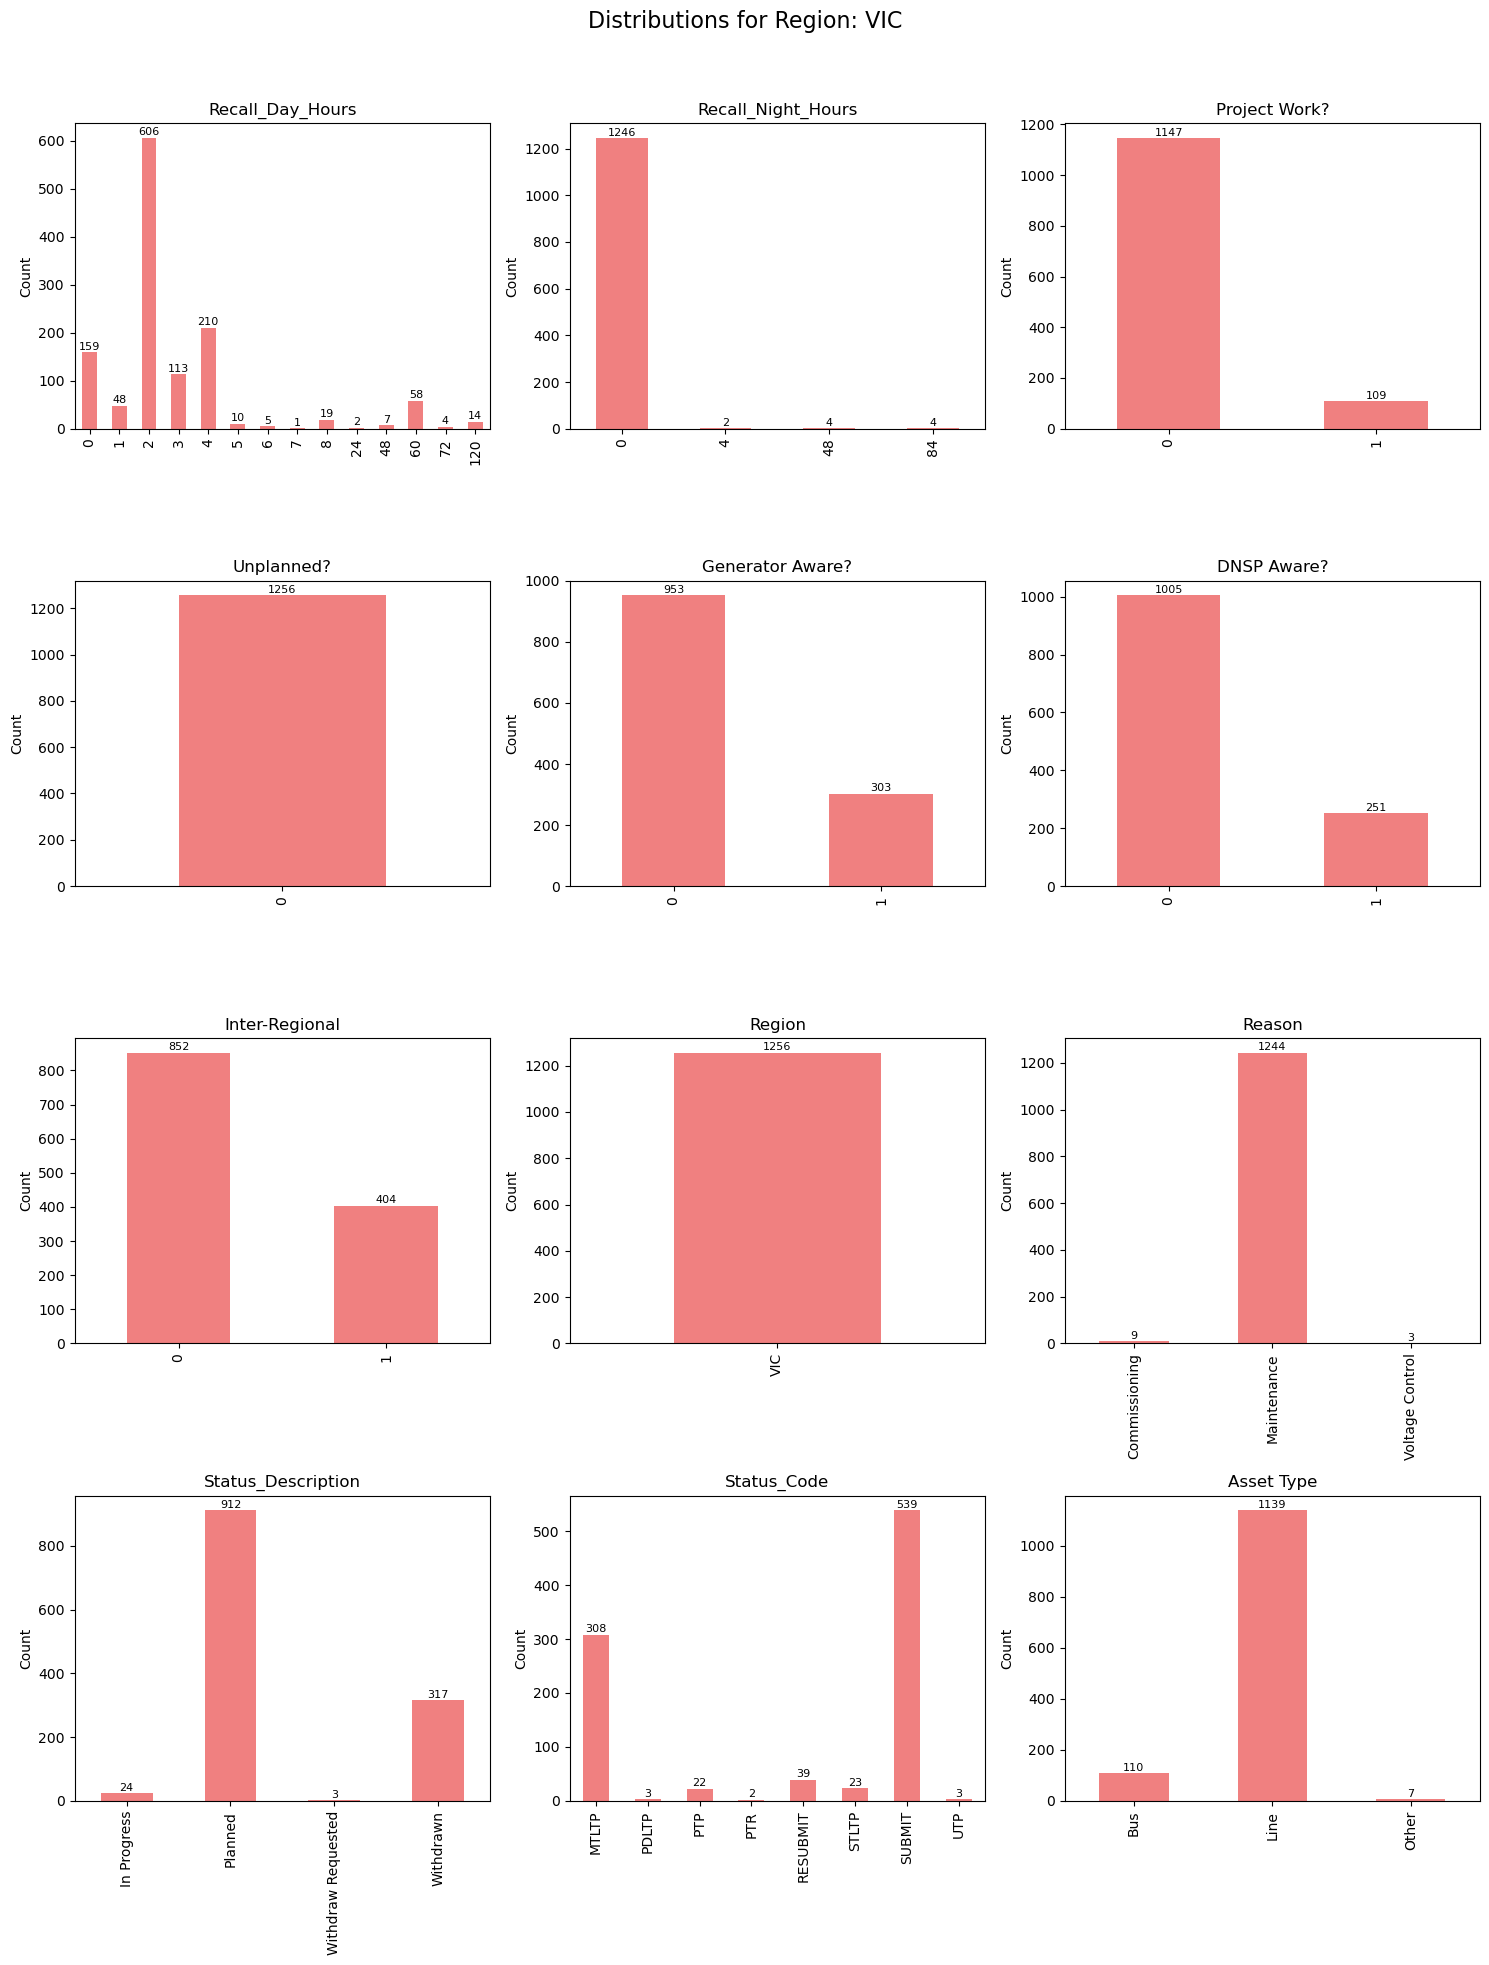

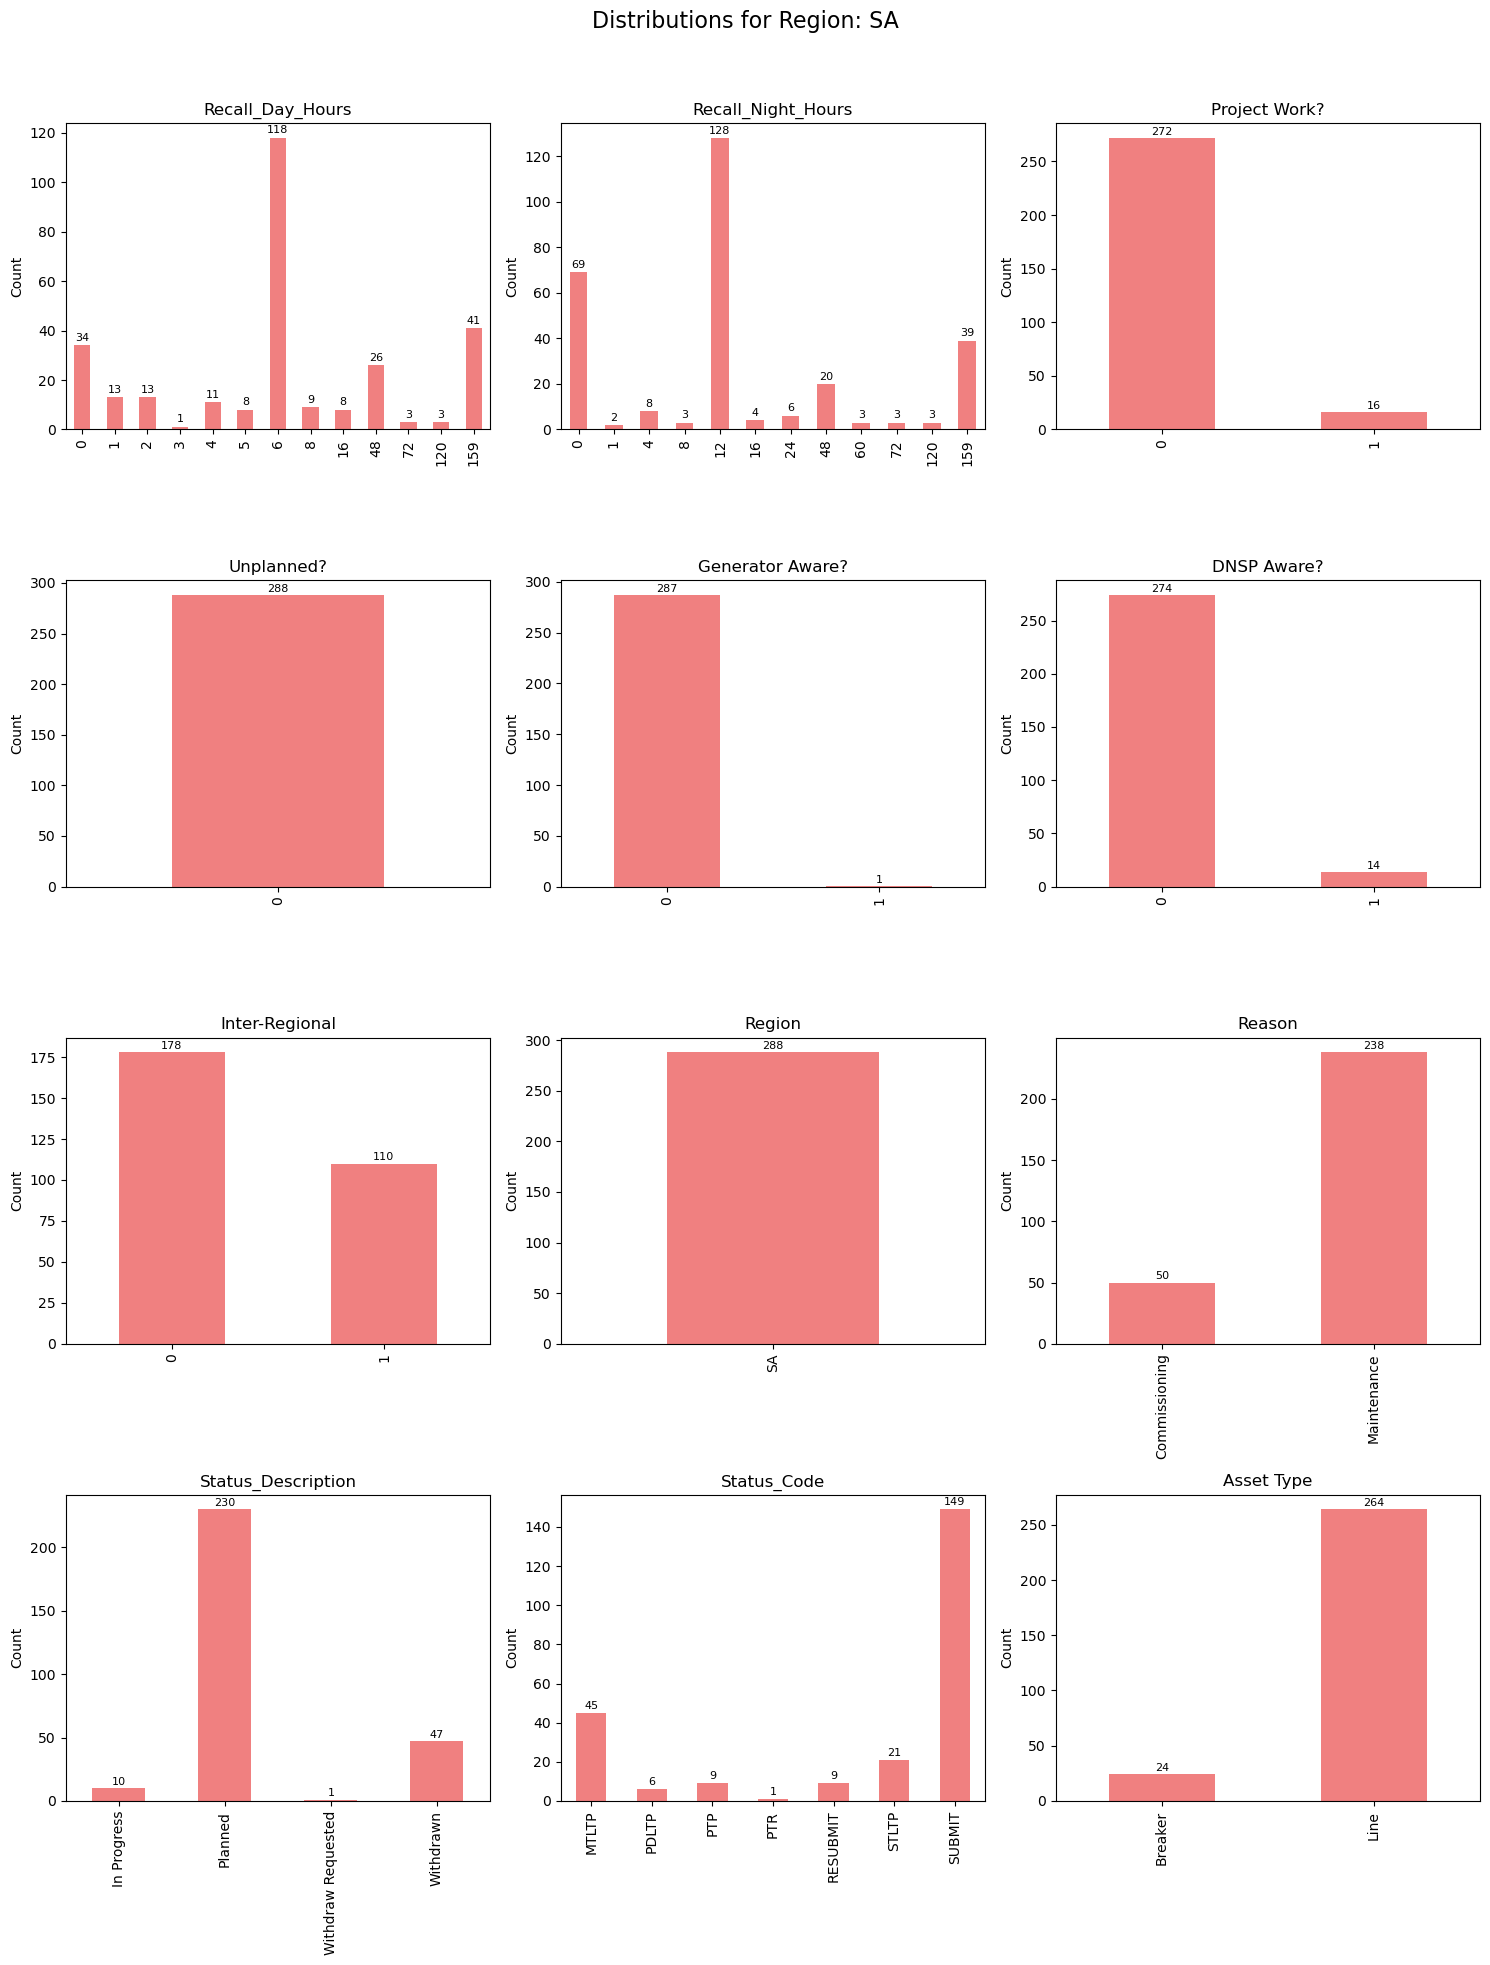

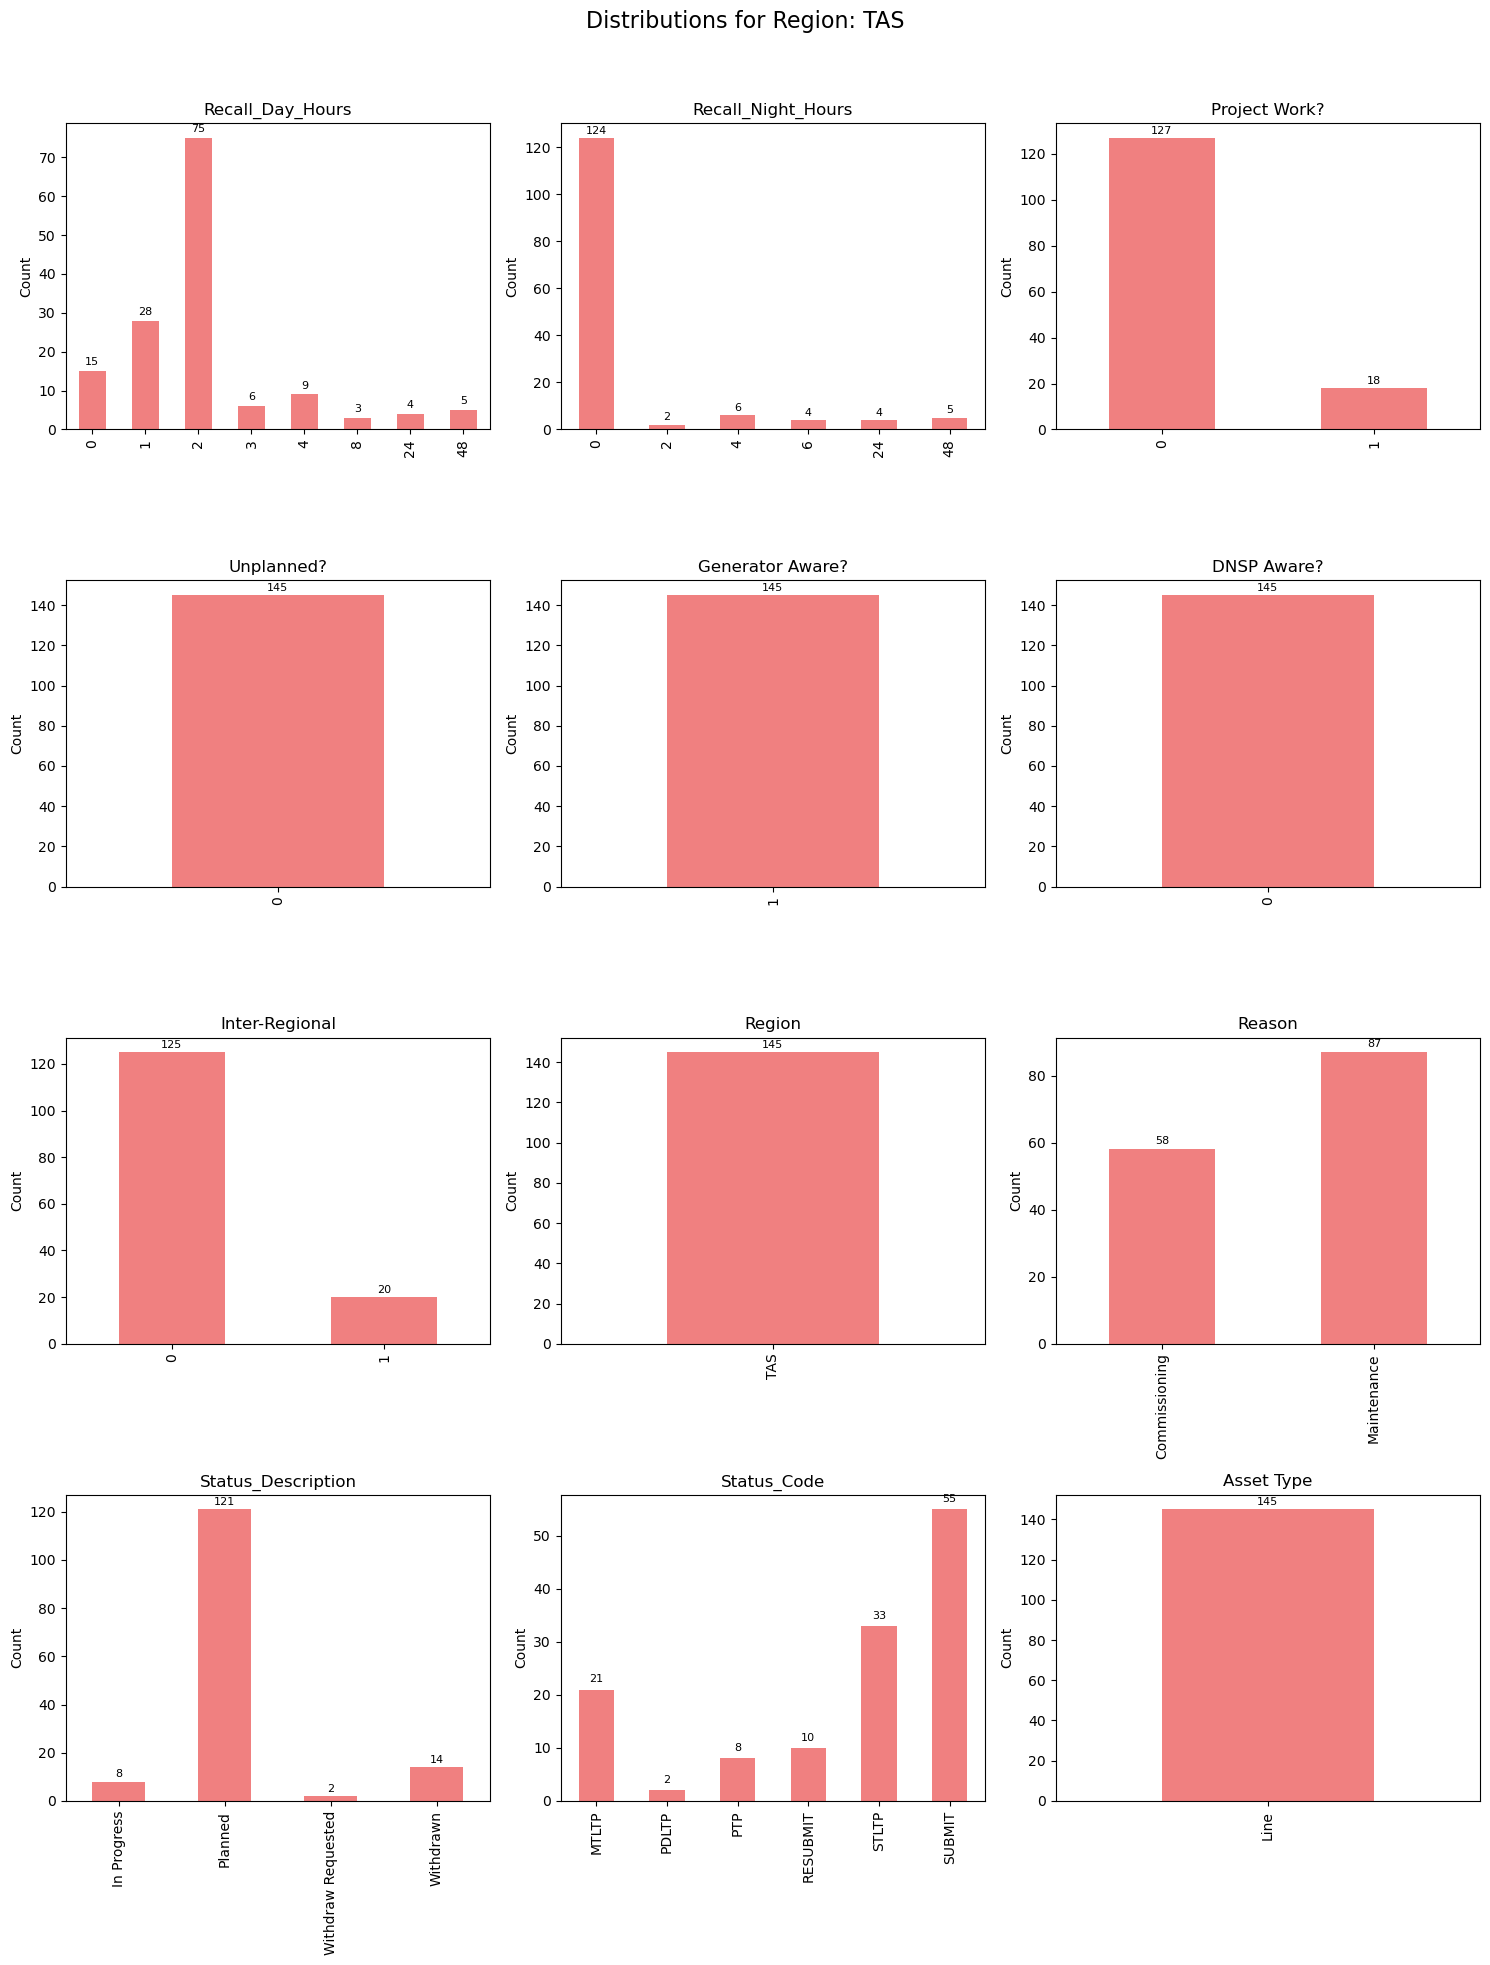

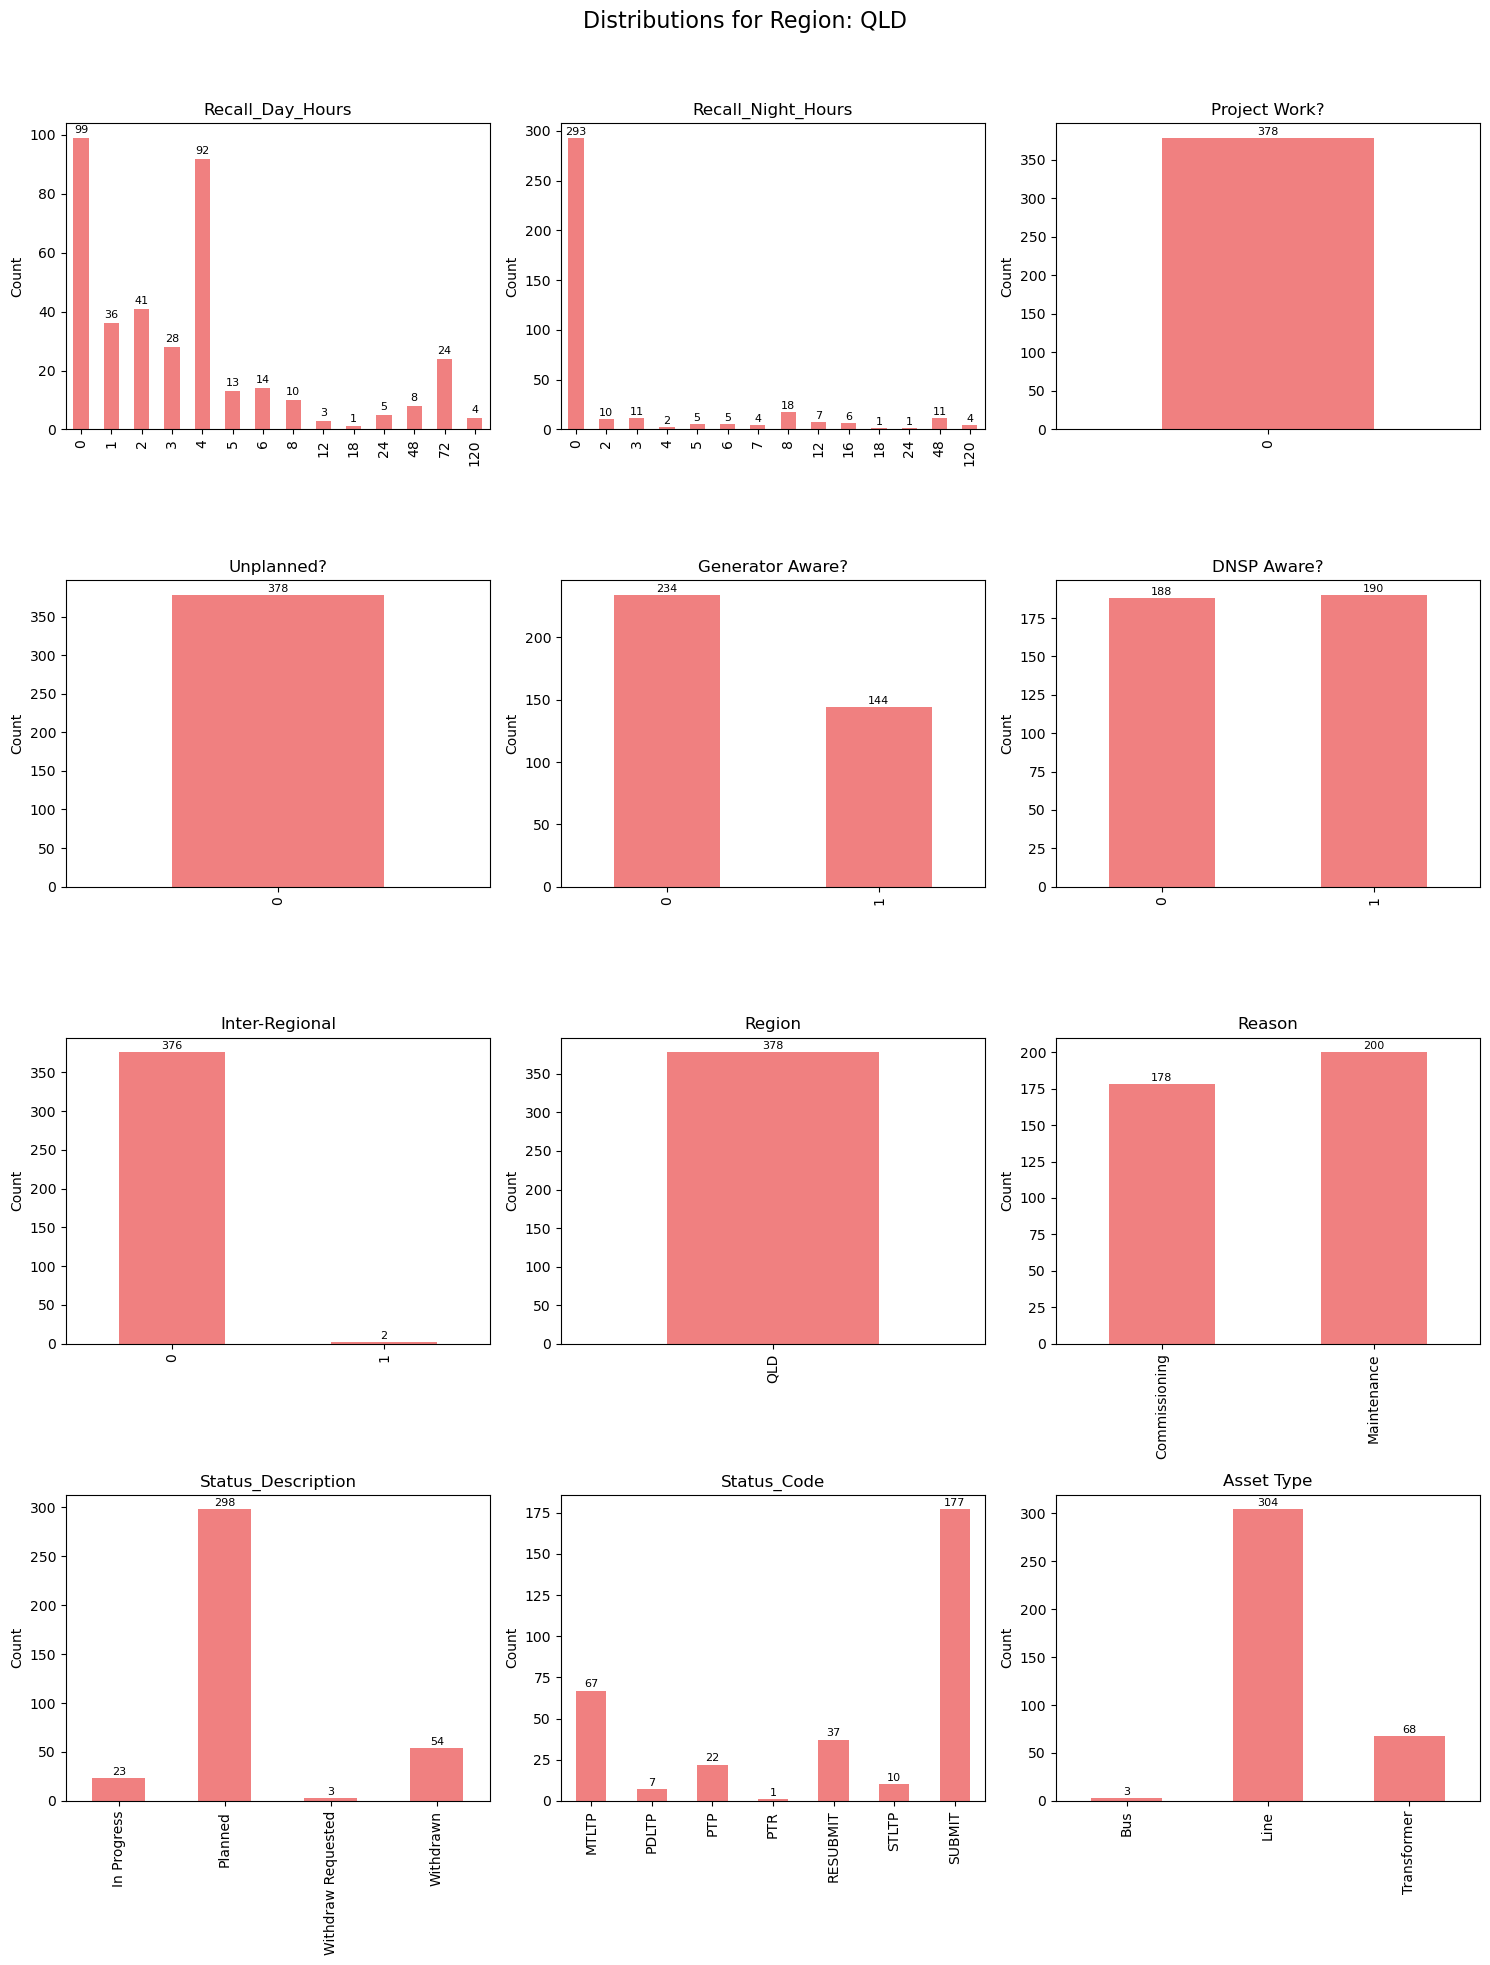

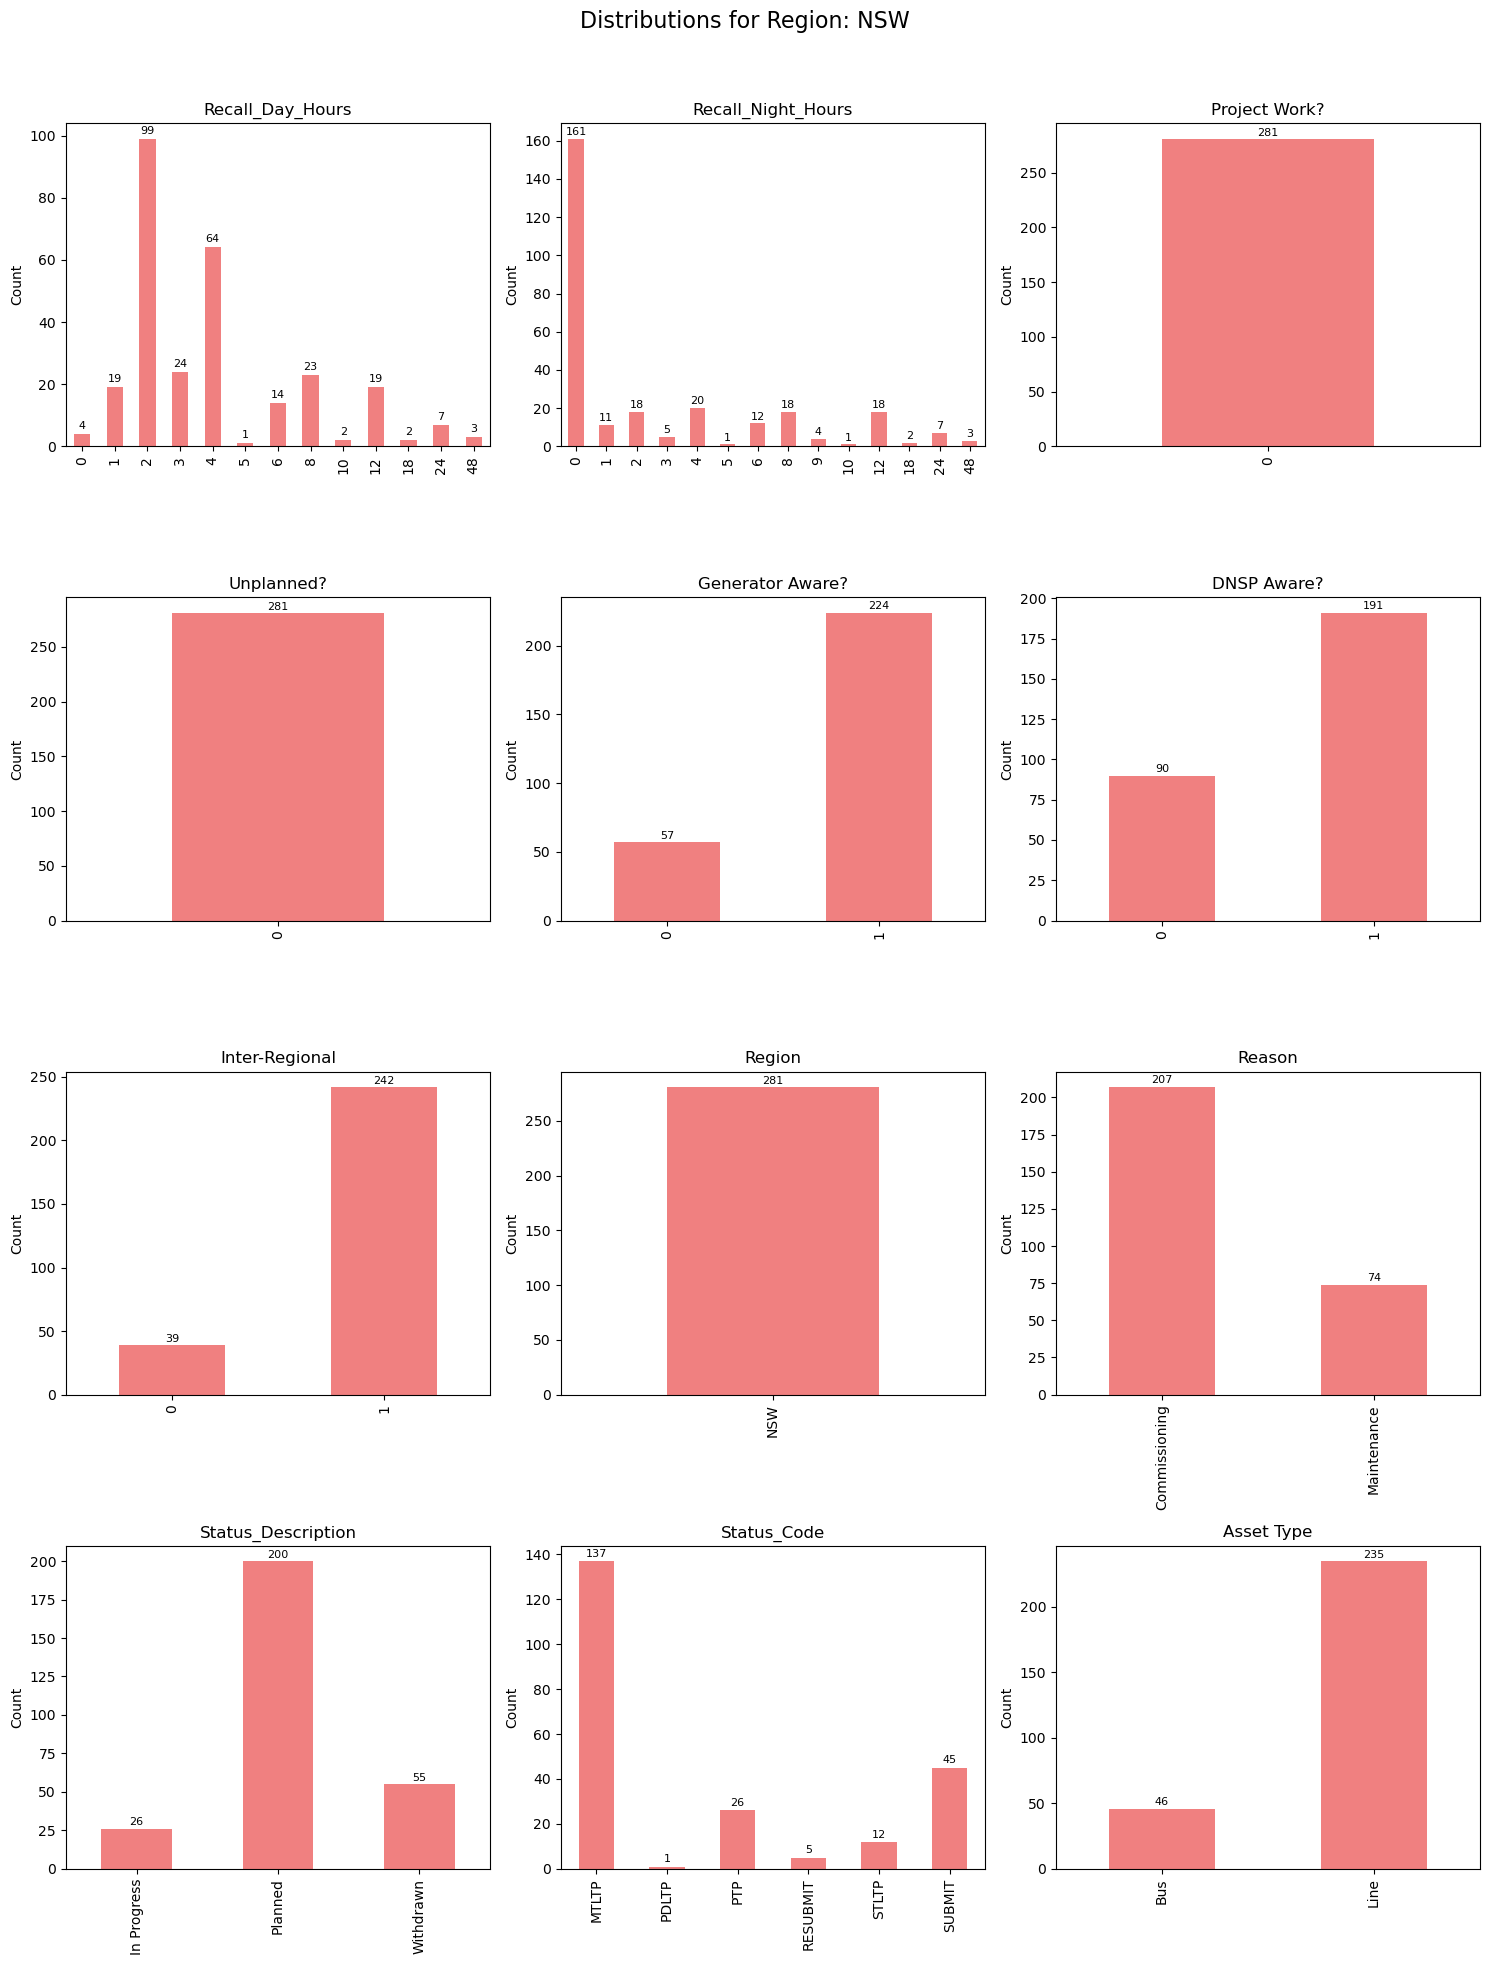

In [15]:
# visualisation for each region

regions = df['Region'].dropna().unique()
n_cols = 3

bool_cols = ['Project Work?', 'Unplanned?', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional']
numeric_cols = ['Recall_Day_Hours', 'Recall_Night_Hours']
categorical_cols = ['Region', 'Reason', 'Status_Description', 'Status_Code', 'Asset Type']

all_cols = numeric_cols + bool_cols + categorical_cols

for region in regions:
    region_df = df[df['Region'] == region]
    n_rows = (len(all_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle(f'Distributions for Region: {region}', fontsize=16)

    for idx, col in enumerate(all_cols):
        ax = axes[idx]
        counts = region_df[col].value_counts().sort_index()
        counts.plot(kind='bar', ax=ax, color='lightcoral')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        for i, value in enumerate(counts):
            ax.text(i, value + 1, str(int(value)), ha='center', va='bottom', fontsize=8)

    for j in range(len(all_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Perform regression for each state

In [17]:
from regression_summary_and_plots import regression_summary_and_plots

In [18]:
# Loop through each unique region and assign a separate DataFrame
for region in df['Region'].unique():
    var_name = region.replace(" ", "_")  
    globals()[var_name] = df[df['Region'] == region].copy()


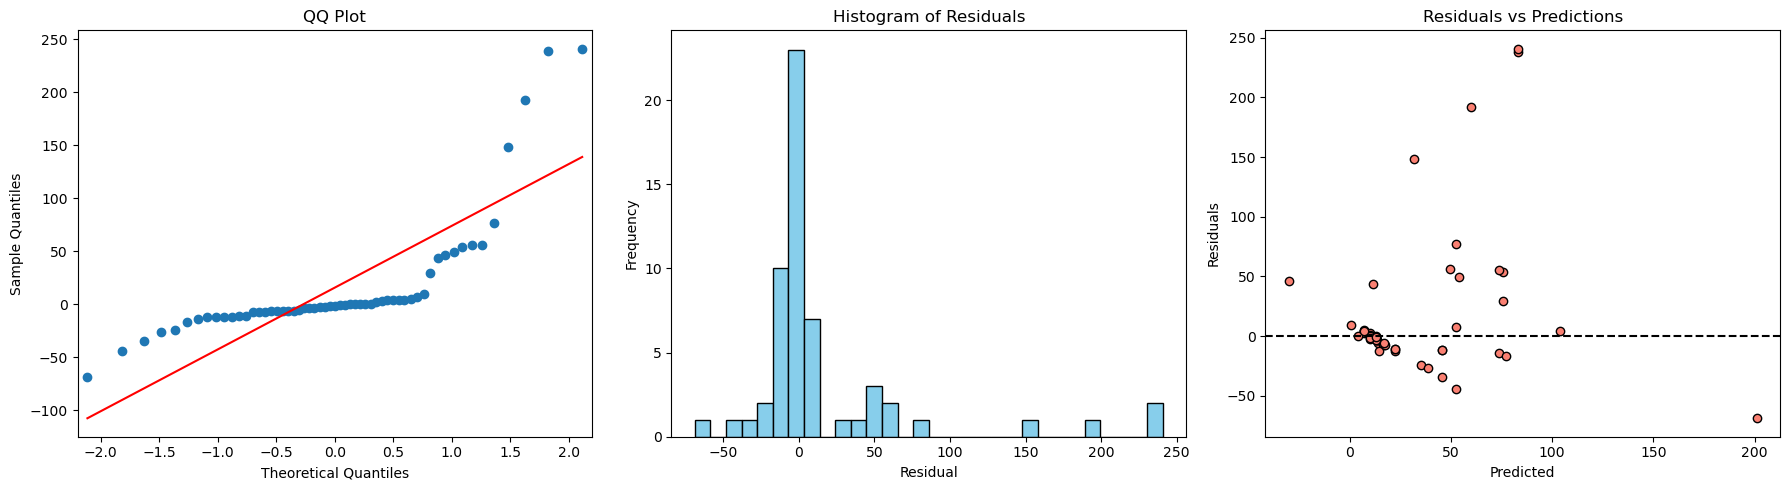

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     32.74
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           5.90e-28
Time:                        18:58:24   Log-Likelihood:                -1097.5
No. Observations:                 224   AIC:                             2209.
Df Residuals:                     217   BIC:                             2233.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4188      2.621     13.896      0.0

In [19]:
regression_summary_and_plots(NSW, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason'])

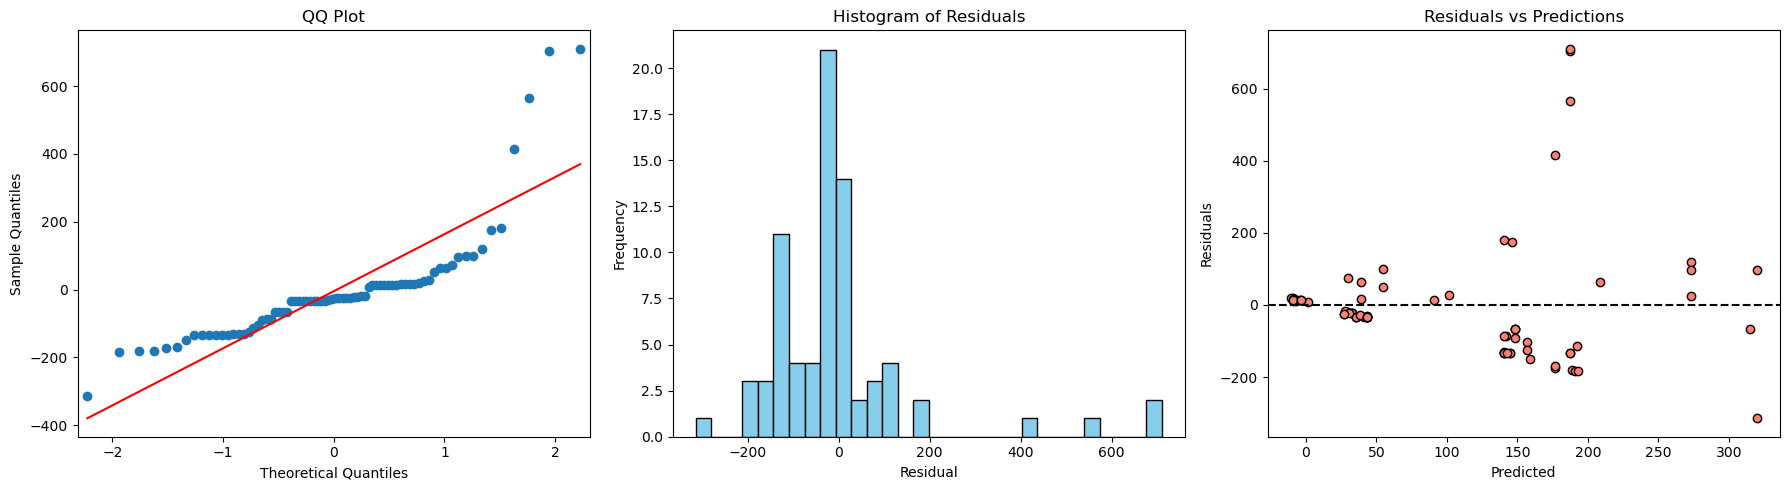

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     20.53
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.34e-17
Time:                        18:58:25   Log-Likelihood:                -1955.3
No. Observations:                 302   AIC:                             3923.
Df Residuals:                     296   BIC:                             3945.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.3182     13.653     13.060      0.0

In [20]:
regression_summary_and_plots(QLD, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Reason'])

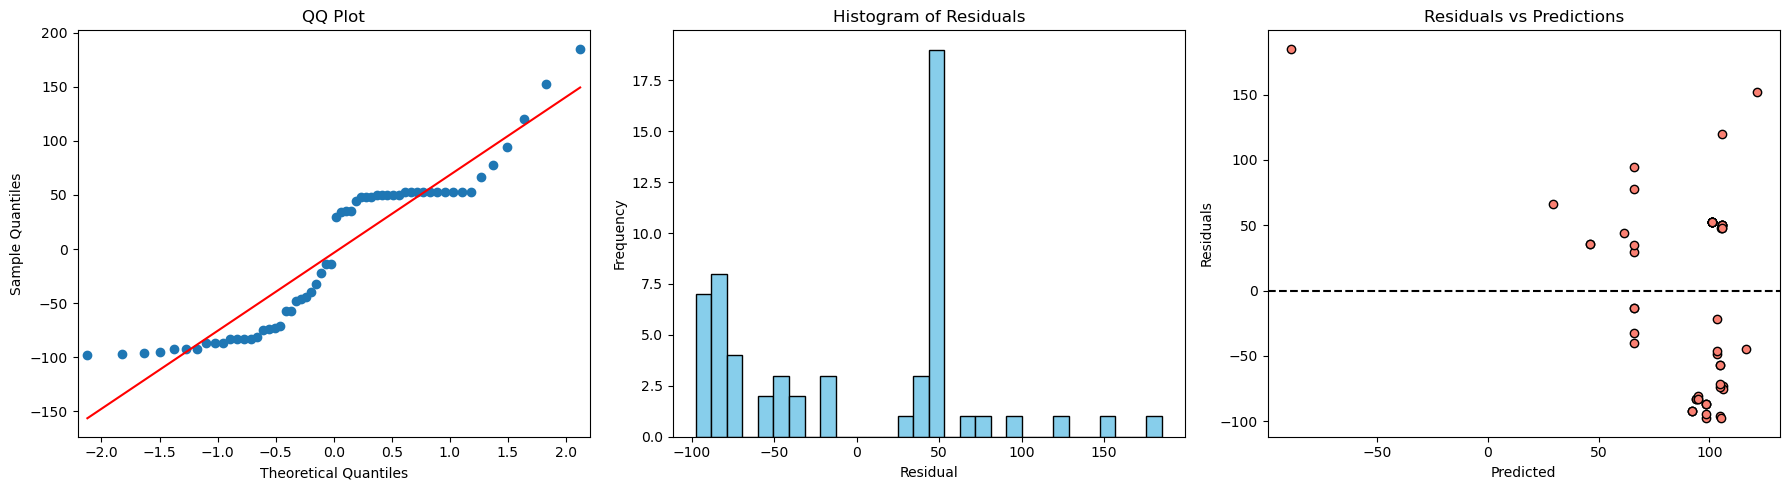

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.439
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00944
Time:                        18:58:25   Log-Likelihood:                -1349.4
No. Observations:                 230   AIC:                             2709.
Df Residuals:                     225   BIC:                             2726.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4448     25.775      1.375      0.1

In [21]:
regression_summary_and_plots(SA, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Inter-Regional', 'Reason'])

In [22]:
regression_summary_and_plots(VIC, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason'])

ValueError: shapes (252,7) and (8,) not aligned: 7 (dim 1) != 8 (dim 0)

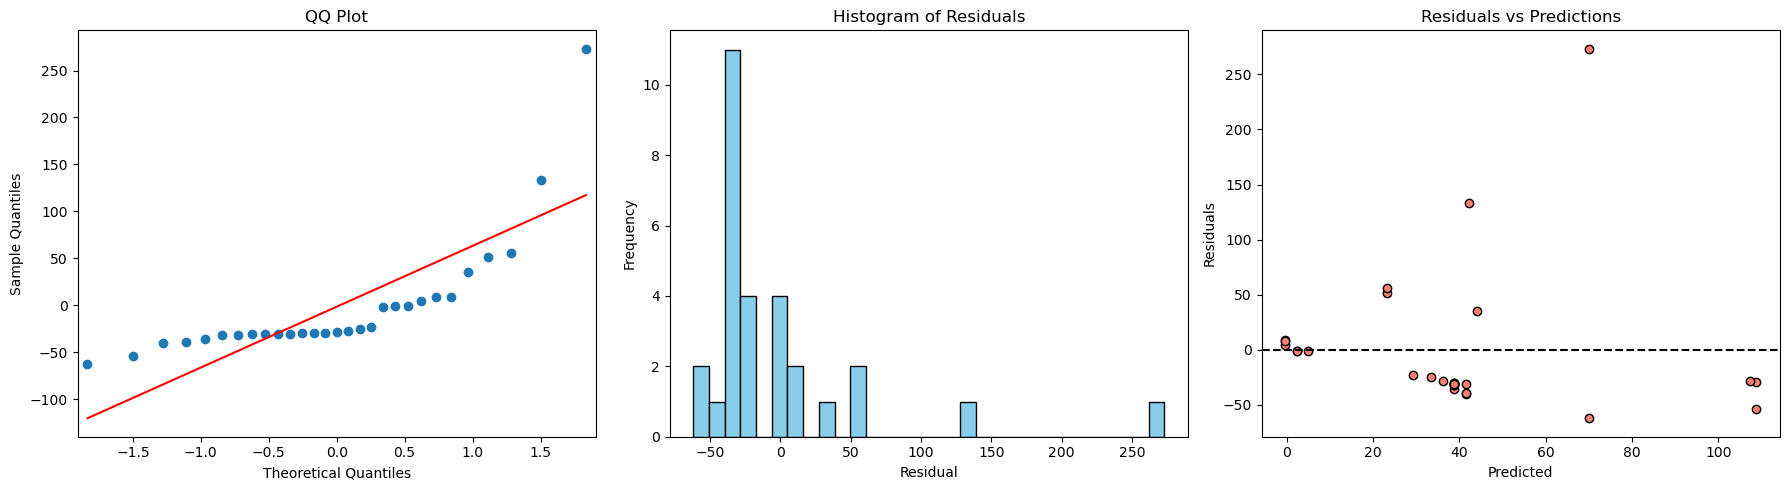

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.597
Date:                Mon, 28 Apr 2025   Prob (F-statistic):             0.0292
Time:                        18:58:54   Log-Likelihood:                -651.67
No. Observations:                 116   AIC:                             1315.
Df Residuals:                     110   BIC:                             1332.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1476     11.006      1.013      0.3

In [23]:
regression_summary_and_plots(TAS, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Project Work?', 'Inter-Regional', 'Reason'])